<a href="https://colab.research.google.com/github/brunofaboci/Data-Science/blob/master/house_price/Linear_Regression_Grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/house_price/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/house_price/test.csv')

In [0]:
def inputValues(df, lista):
  for col in lista:
    if df[col].dtype == object:
      df[col].fillna('NA', inplace=True)
    else:
      df[col].fillna(0, inplace=True)


In [0]:
def toDate(df, lista):
  for col in lista:
    df['combined'] = df[col] * 1000 + 1
    df[col] = pd.to_datetime(df['combined'], format='%Y%j')
    df.drop(columns='combined', inplace=True)

Dados de Treino

In [0]:
mean_lot = train['LotFrontage'].mean()
train['LotFrontage'].fillna(mean_lot, inplace=True)

train['MasVnrType'].fillna('None', inplace=True)

train['Electrical'].fillna('SBrkr', inplace=True)

train['GarageYrBlt'].fillna(train['YearBuilt'], inplace=True)

In [0]:
lista = ['MSZoning','Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
              'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
              'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 
              'SaleType']

inputValues(train, lista)

In [10]:
train.isnull().any().sum()

0

Dados de Teste

In [0]:
mean_lot_test = test['LotFrontage'].mean()
test['LotFrontage'].fillna(mean_lot_test, inplace=True)

test['MasVnrType'].fillna('None', inplace=True)

test['Electrical'].fillna('SBrkr', inplace=True)

test['GarageYrBlt'].fillna(test['YearBuilt'], inplace=True)

In [0]:
lista_test = ['MSZoning','Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
              'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
              'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 
              'SaleType']

inputValues(test, lista_test)

In [13]:
test.isnull().any().sum()

0

In [0]:
years = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
toDate(train, years)
toDate(test, years)

### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003-01-01,2003-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003-01-01,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008-01-01,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976-01-01,1976-01-01,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976-01-01,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007-01-01,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001-01-01,2002-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001-01-01,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008-01-01,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915-01-01,1970-01-01,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998-01-01,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006-01-01,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000-01-01,2000-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000-01-01,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008-01-01,WD,Normal,250000


Antes de começar a trabalhar com ML, há uma feature importante que podemos criar afim de melhorar nosso modelo.

Uma informação que influencia muito no valor de uma casa é sua área construida.

Podemos criar uma coluna somando a àrea do porão, primeiro piso e segundo piso, obtendo assim a metragem total da casa.

In [0]:
train['AreaTotalConst'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

Agora, vamos verificar a correlação das variaveis

In [19]:
correlation = train.corr()
correlation = correlation['SalePrice'].sort_values(ascending=False)
correlation

SalePrice         1.000000
OverallQual       0.790982
AreaTotalConst    0.782260
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
MasVnrArea        0.472614
Fireplaces        0.466929
BsmtFinSF1        0.386420
LotFrontage       0.334901
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
OverallCond      -0.077856
MSSubClass       -0.084284
EnclosedPorch    -0.128578
KitchenAbvGr     -0.135907
Name: SalePrice, dtype: float64

agora vamos selecionar os 15 primeiros valores da lista

In [20]:
len(correlation)

35

In [21]:
variaveis = correlation.index[1:36]
train[variaveis].head()

,OverallQual,AreaTotalConst,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch,BsmtFinSF2,BsmtHalfBath,MiscVal,Id,LowQualFinSF,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr
0,7,2566,1710,2,548,856,856,2,8,196.0,0,706,65.0,0,854,61,1,8450,1,150,3,0,0,2,0,0,0,0,1,0,5,60,0,1
1,6,2524,1262,2,460,1262,1262,2,6,0.0,1,978,80.0,298,0,0,0,9600,0,284,3,0,0,5,0,0,1,0,2,0,8,20,0,1
2,7,2706,1786,2,608,920,920,2,6,162.0,1,486,68.0,0,866,42,1,11250,1,434,3,0,0,9,0,0,0,0,3,0,5,60,0,1
3,7,2473,1717,3,642,756,961,1,7,0.0,1,216,60.0,0,756,35,0,9550,1,540,3,0,0,2,0,0,0,0,4,0,5,70,272,1
4,8,3343,2198,3,836,1145,1145,2,9,350.0,1,655,84.0,192,1053,84,1,14260,1,490,4,0,0,12,0,0,0,0,5,0,5,60,0,1


### Tratando Outliers


É prudente verificar a existencia de valores anômalos (outliers) antes de aplicar nosso modelo de Machine Learn.

Vamos fazer essa verificação com a feature que possuí maior correlação com nossa coluna alvo.

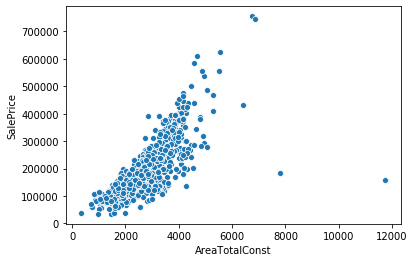

In [22]:
# AreaTotalConst
%matplotlib inline
sns.scatterplot(x='AreaTotalConst', y='SalePrice', data=train)

Podemos ver que há dois valores bem distintos no gráfico. Ambos são de casas que possuem área construida acima de 6.000 ft² e valor de venda abaixo de $300.000.

Esses são valores incoerentes com a realidade, e que podem prejudicar nosso modelo, por isso vamos removê-los.

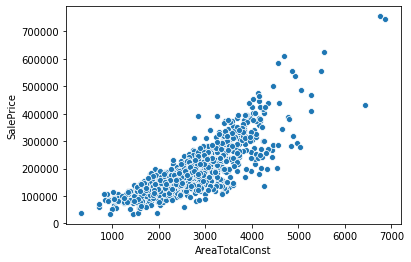

In [23]:
train = train.drop(train[(train['AreaTotalConst'] > 6000) & (train['SalePrice'] < 300000)].index)

sns.scatterplot(x='AreaTotalConst', y='SalePrice', data=train)

### Analisando a Variável Alvo

A coluna para a qual queremos fazer as previsões é a 'SalePrice', vamos analisar os dados dessa coluna.

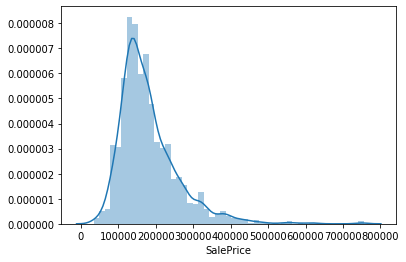

In [24]:
%matplotlib inline
sns.distplot(train['SalePrice'])

Os dados da coluna 'SalePrice' apresentam uma inclinação à esquerda do gráfico.

Modelos Lineares tendem a trabalhar com distribuições normais de dados.

Podemos melhorar a distribuição dos dados utilizando uma transformação logaritima.

In [0]:
train['SalePriceLog'] = np.log(train['SalePrice'])

vamos verificar novamente...

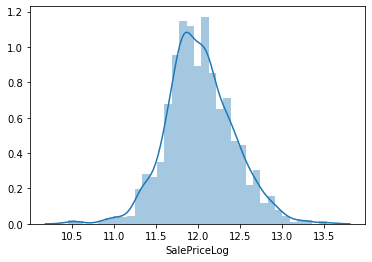

In [26]:
sns.distplot(train['SalePriceLog'])

Parece bem melhor agora.

Separando os dados

In [0]:
X = train[variaveis]
y = train['SalePriceLog']

Separando os dados de treino e validação

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, y_train.shape

((1166, 34), (1166,))

In [30]:
X_val.shape, y_val.shape

((292, 34), (292,))

### Regressão Linear

In [31]:
# modelo Linear sem GridSearch
# intanciando o modelo
lr = LinearRegression()

# treinando...
lr.fit(X_train, y_train)

# predizendo os valores...
lr_pred = lr.predict(X_val)

# métrica R²
r2_lr = r2_score(y_val, lr_pred)

# métrica RMSE
rmse_lr = np.sqrt(mean_squared_error(y_val, lr_pred))

# métrica RMSLE
rmsle_lr = np.sqrt(mean_squared_log_error(y_val, lr_pred))

print('R²: ' + str(r2_lr)[0:6])
print('RMSE: ' + str(rmse_lr)[0:6])
print('RMSLE: ' + str(rmsle_lr)[0:6])

R²: 0.8743
RMSE: 0.1455
RMSLE: 0.0114


In [39]:
# fazedno a validação cruzada
score_lr = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')
print('Score: ' + str(np.mean(score_lr))[0:6])

Score: 0.8718


In [42]:
# modelo Linear c/ GridSearch
# instanciando o modelo
lr_model = LinearRegression()

# definir parametros
param_lr = {'fit_intercept': [True, False], 
            'normalize': [True, False], 
            'copy_X': [False],
            'n_jobs': [-1, 1]}

# atribuir ao GridSearchCV
grid_lr = GridSearchCV(lr_model, param_lr, verbose=1, scoring='r2')

# treinar
grid_lr.fit(X_train, y_train)

print('Melhor Modelo: ' + str(grid_lr.best_estimator_))
print('Best Score: ' + str(grid_lr.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Melhor Modelo: LinearRegression(copy_X=False, fit_intercept=True, n_jobs=-1, normalize=True)
Best Score: 0.871022495685637


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


In [34]:
# atribuir melhores parametros
lr_model = grid_lr.best_estimator_

# treinar
lr_model.fit(X_train, y_train)

# predizer
model_pred = lr_model.predict(X_val)

# metrica r²
r2_model = r2_score(y_val, model_pred)

# metrica RMSE
rmse_model = np.sqrt(mean_squared_error(y_val, model_pred))

# metrica RMSLE
rmsle_model = np.sqrt(mean_squared_log_error(y_val, model_pred))

print('R² Score: ' + str(r2_model)[0:6])
print('RMSE Score: ' + str(rmse_model)[0:6])
print('RMSLE Score: ' + str(rmsle_model)[0:6])

R² Score: 0.8743
RMSE Score: 0.1455
RMSLE Score: 0.0114


In [35]:
scores_model = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='r2')
print('Cross Validation Score: ' + str(np.mean(scores_model))[0:6])

Cross Validation Score: 0.8718


### Avaliando o modelo

In [36]:
model_stats = pd.DataFrame({
    "Model" : ["LR Grid",'LR'],
    "Best Score" : [grid_lr.best_score_, np.mean(score_lr[0:6])],
    "R Squared" : [str(r2_model)[0:6], str(r2_lr)[0:6]], 
    "RMSE" : [str(rmse_model)[0:6], str(rmse_lr)[0:6]],
    'RMSLE' : [str(rmsle_model)[0:6], str(rmsle_lr)[0:6]]
})

print('By Score')
model_stats.sort_values(by='Best Score', ascending=False)

By Score


,Model,Best Score,R Squared,RMSE,RMSLE
0,LR Grid,0.871022,0.8743,0.1455,0.0114
1,LR,0.858144,0.8743,0.1455,0.0114


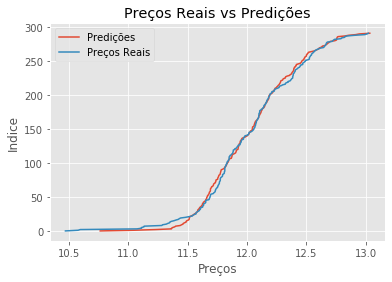

In [37]:
%matplotlib inline
# Armazena dados preditos em dataframe.
predicoes = pd.DataFrame(lr_model.predict(X_val))

# Armazena dados reais em dataframe.
y_val2 = pd.DataFrame(y_val.values)

# Define o estilo do gráfico.
plt.style.use("ggplot")

# Definição de título de eixos do gráfico.
plt.xlabel('Preços')
plt.ylabel('Indice')
plt.title('Preços Reais vs Predições')

# Ordena os valores e plota as linhas
plt.plot(predicoes.sort_values(by=0), predicoes.index)
plt.plot(y_val2.sort_values(by=0), y_val2.index)

# Define legenda do gráfico
plt.legend(['Predições','Preços Reais'])